In [18]:
import pandas as pd

from settings import key
from datetime import datetime


In [19]:
coords = []

with open("server.log", "r") as f:
    while line := f.readline():
        if '/api/v1/forecast/cities?lat=' in line:
            coords.append([
                str(float(line.split("=")[1].split("&")[0])), # lat
                str(float(line.split("=")[2].split("&")[0].split(" ")[0])), # lon
                datetime.strptime(line.split(",")[0][1:], '%Y-%m-%d %H:%M:%S'), # time
            ])


In [20]:
df = pd.DataFrame(coords)


In [21]:
df.columns

RangeIndex(start=0, stop=3, step=1)

In [22]:
df["date_h"] = df[2].apply(lambda r: r.strftime("%Y-%m-%d %H"))

In [23]:
df_h = pd.DataFrame(df.groupby("date_h").count()[1]/3)

<Axes: xlabel='date_h'>

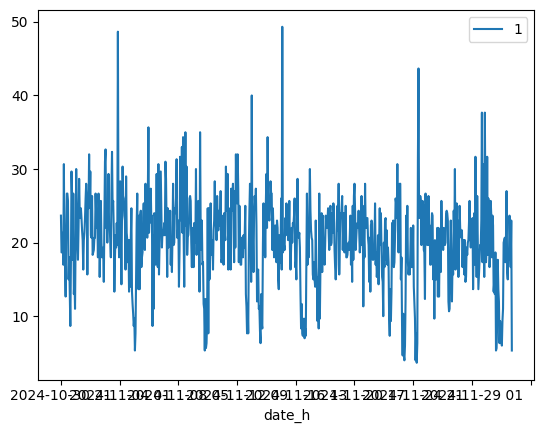

In [24]:
df_h.plot()

In [25]:
from sklearn import linear_model


In [26]:
reg = linear_model.LinearRegression()


In [27]:
import numpy as np


In [28]:
df_h_vals = df_h[1].values.reshape(-1, 1)
df_h_ct = np.array(range(len(df_h_vals))).reshape(-1, 1)


In [29]:
reg.fit(df_h_ct, df_h_vals)


LinearRegression()

In [30]:
import matplotlib.pyplot as plt


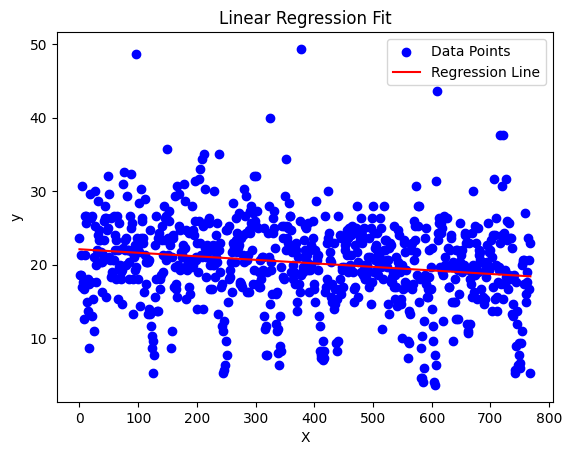

In [31]:
y_pred = reg.predict(df_h_ct)
plt.scatter(df_h_ct, df_h_vals, color='blue', label='Data Points')
plt.plot(df_h_ct, y_pred, color='red', label='Regression Line')

plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Linear Regression Fit")

plt.show()

In [32]:
y_pred

array([[22.10624244],
       [22.10144713],
       [22.09665183],
       [22.09185653],
       [22.08706122],
       [22.08226592],
       [22.07747062],
       [22.07267532],
       [22.06788001],
       [22.06308471],
       [22.05828941],
       [22.0534941 ],
       [22.0486988 ],
       [22.0439035 ],
       [22.03910819],
       [22.03431289],
       [22.02951759],
       [22.02472229],
       [22.01992698],
       [22.01513168],
       [22.01033638],
       [22.00554107],
       [22.00074577],
       [21.99595047],
       [21.99115517],
       [21.98635986],
       [21.98156456],
       [21.97676926],
       [21.97197395],
       [21.96717865],
       [21.96238335],
       [21.95758805],
       [21.95279274],
       [21.94799744],
       [21.94320214],
       [21.93840683],
       [21.93361153],
       [21.92881623],
       [21.92402093],
       [21.91922562],
       [21.91443032],
       [21.90963502],
       [21.90483971],
       [21.90004441],
       [21.89524911],
       [21